Goes back to root folder

In [1]:
%cd ../..

/home/alexandre/Documents/projects/deepwalk-node2vec-comparison


In [2]:
from os.path import join

import torch
import numpy as np
import matplotlib.pyplot as plt

from node_embeddings.model import deepWalk
from node_embeddings.experiments.base import save_figure, init
from node_embeddings.dataset import BlogCatalogDataset

EXPERIMENT_NAME = 'jupyter_run'
EXPERIMENT_OUTPUT_PATH = join('output', EXPERIMENT_NAME)
SEED=1234

In [3]:
init(path=EXPERIMENT_OUTPUT_PATH, seed=SEED)
dataset = BlogCatalogDataset()
data = dataset.load()

Number of nodes:  10312
Number of edges:  333983


In [4]:
%prun embedding, loss_history = deepWalk( \
        graph=data['graph'],  \
        walks_per_vertex=10, \
        walk_length=80, \
        window_size=10,  \
        embedding_size=128,\
        num_neg=2,\
        lr=1e-2,\
        epochs=1,\
        batch_size=64)

162it [04:34,  1.69s/it]                                                                                                                                                                            


         62726297 function calls (62717572 primitive calls) in 275.193 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10312  126.637    0.012  146.559    0.014 random_walk.py:5(gen_random_walk_tensor)
      162   85.475    0.528   85.475    0.528 {method 'run_backward' of 'torch._C._EngineBase' objects}
      324   35.466    0.109   39.365    0.121 random_walk.py:37(get_windows_dotproduct)
  8146489    5.273    0.000    7.655    0.000 random.py:250(_randbelow_with_getrandbits)
  8146488    4.871    0.000   13.559    0.000 random.py:285(choice)
  8146480    4.763    0.000    6.176    0.000 graph.py:1315(neighbors)
      324    3.882    0.012    3.882    0.012 {method 'sum' of 'torch._C.TensorBase' objects}
 11862022    1.416    0.000    1.416    0.000 {method 'getrandbits' of '_random.Random' objects}
  8146820    1.413    0.000    1.413    0.000 {built-in method builtins.iter}
8200707/8200334    1.036    0.000    1.036

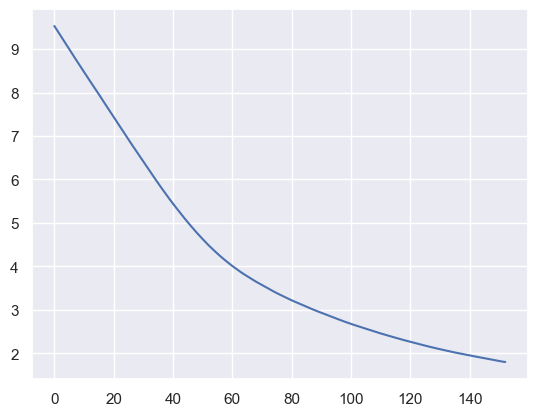

In [8]:
cumsum_vec = np.cumsum(np.insert(loss_history['total'], 0, 0)) 
window_width = 10
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
plt.plot(ma_vec)
plt.show()

In [9]:
_, microf1, macrof1 = dataset.get_evaluator().evaluate(embedding, data['labels'], labeled_portion=0.5)
print(f'Micro F1: {microf1:.2%}')
print(f'Macro F1: {macrof1:.2%}')

Micro F1: 7.00%
Macro F1: 2.95%


In [10]:
torch.save(embedding, join(EXPERIMENT_OUTPUT_PATH, 'embedding.pt'))